In [1]:
import pandas as pd
import os
from pathlib import Path
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from plotnine import *
from datetime import datetime
from arch.unitroot import PhillipsPerron

In [2]:
path = Path(os.getcwd())

In [3]:
base_dir = path.parent.parent

In [4]:
sys.path

['',
 '/anaconda3/lib/python36.zip',
 '/anaconda3/lib/python3.6',
 '/anaconda3/lib/python3.6/lib-dynload',
 '/anaconda3/lib/python3.6/site-packages',
 '/anaconda3/lib/python3.6/site-packages/aeosa',
 '/Users/mate_toth/Projects/Python/oreilly_pytest/adv_pytest_mar_22_2018/block',
 '/Users/mate_toth/Projects/Python/oreilly_pytest/adv_pytest_mar_22_2018/skilift',
 '/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/mate_toth/.ipython']

In [7]:
data_in = os.path.join(str(base_dir) , "da_data_repo/stocks-sp500/raw/")

In [8]:
data_out = os.path.join(str(base_dir), "da_data_repo/stocks-sp500/clean/")

In [9]:
output = os.path.join(str(base_dir), "da_case_studies/ch12-stock-returns-risk/output/")

In [ ]:
func = os.path.join(str(base_dir) ,   "da_case_studies/ch00-tech-prep/")

In [ ]:
sys.path.append(func)

In [10]:
stock_data = pd.read_csv(os.path.join(data_in,"ready_sp500_45_cos.csv"))

In [11]:
stock_data.head()

,ticker,ref.date,price.open,price.close,price.adjusted,price.low,price.high,volume
0,ACN,2001-07-19,15.10,15.17,11.497672,15.00,15.29,34994300.0
1,ACN,2001-07-20,15.05,15.01,11.376402,14.80,15.05,9238500.0
2,ACN,2001-07-23,15.00,15.00,11.368821,14.55,15.01,7501000.0
3,ACN,2001-07-24,14.95,14.86,11.262713,14.70,14.97,3537300.0
4,ACN,2001-07-25,14.70,14.95,11.330926,14.65,14.95,4208100.0


In [12]:
MSFT = stock_data[stock_data['ticker']=='MSFT']

In [13]:
p_MSFT = MSFT[['ref.date','price.close']]. \
rename(columns={'ref.date':'date'}). \
reset_index(drop=True)

In [14]:
p_MSFT['date']=pd.to_datetime(p_MSFT['date'])

In [15]:
p_MSFT.head()

,date,price.close
0,1997-12-29,15.789063
1,1997-12-30,16.281250
2,1997-12-31,16.156250
3,1998-01-02,16.390625
4,1998-01-05,16.296875


In [16]:
sp500_index = pd.read_csv(os.path.join(data_in,"ready_sp500_index.csv"))

In [17]:
p_SP500 = sp500_index[['ref.date','price.close']]. \
rename(columns={'ref.date':'date'}). \
reset_index(drop=True)

In [18]:
p_SP500['date']=pd.to_datetime(p_SP500['date'])

In [19]:
data_daily=pd.merge(p_SP500,p_MSFT,how='inner',on='date').\
rename(columns={'price.close_x':'p_SP500','price.close_y':'p_MSFT'})

In [20]:
data_daily = data_daily[(data_daily['date']>='1997-12-31') & \
           (data_daily['date']<='2018-12-31')] 

In [21]:
data_daily['year'] = data_daily['date'].dt.year

In [22]:
data_daily['month'] = data_daily['date'].dt.month

In [23]:
data_daily.to_csv(os.path.join(data_out,"stock-prices-daily.csv"))

In [24]:
data_daily.head()

,date,p_SP500,p_MSFT,year,month
2,1997-12-31,970.429993,16.156250,1997,12
3,1998-01-02,975.039978,16.390625,1998,1
4,1998-01-05,977.070007,16.296875,1998,1
5,1998-01-06,966.580017,16.390625,1998,1
6,1998-01-07,964.000000,16.195313,1998,1


In [25]:
data_daily['lnp_MSFT']=data_daily['p_MSFT'].map(lambda x:np.log(x))

In [26]:
data_daily['lnp_SP500']=data_daily['p_SP500'].map(lambda x:np.log(x))

In [27]:
limits = datetime(1998, 1, 1), datetime(2018, 1, 1)

In [28]:
breaks = date_breaks('2 year')

In [29]:
breaks(limits)[::2]

[datetime.datetime(1998, 1, 1, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2002, 1, 1, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2006, 1, 1, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2010, 1, 1, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2014, 1, 1, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2018, 1, 1, 0, 0, tzinfo=datetime.timezone.utc)]

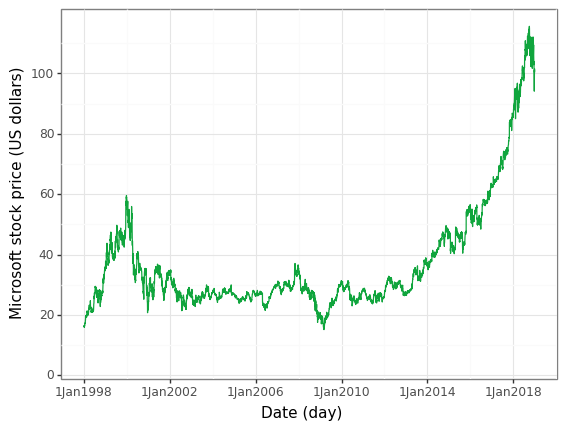

<ggplot: (299917839)>

In [30]:
(ggplot(data_daily) 
  + geom_line(aes('date','p_MSFT'),color = color[1], size = 0.5) 
  + scale_y_continuous(expand = [0.01,0.01],limits = [0,120], breaks = seq(0,120,20)) 
  + scale_x_date(breaks = breaks(limits)[::2], labels = date_format("1%b%Y")) 
  + labs(y = "Microsoft stock price (US dollars)",x= "Date (day)") 
  + theme_bw())

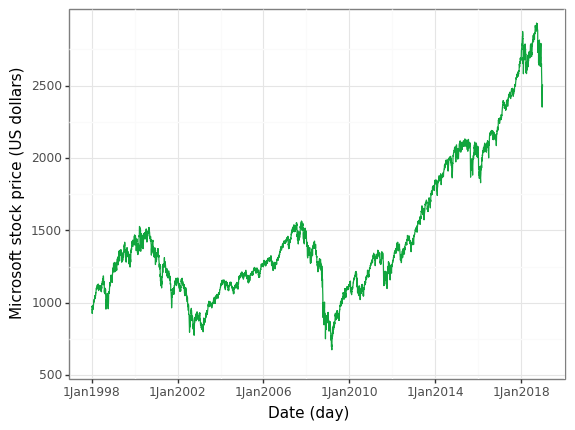

<ggplot: (300180330)>

In [31]:
(ggplot(data_daily) 
  + geom_line(aes('date','p_SP500'),color = color[1], size = 0.5) 
  + scale_y_continuous(expand = [0.01,0.01],limits = [500,3000], breaks = seq(500,3000,500)) 
  + scale_x_date(breaks = breaks(limits)[::2], labels = date_format("1%b%Y")) 
  + labs(y = "Microsoft stock price (US dollars)",x= "Date (day)") 
  + theme_bw())

In [32]:
from arch.unitroot import PhillipsPerron

In [33]:
print(PhillipsPerron(data_daily['p_MSFT'],lags=32,test_type='rho',trend='n'))
print(PhillipsPerron(data_daily['p_MSFT'],lags=32,test_type='rho',trend='c'))
print(PhillipsPerron(data_daily['p_MSFT'],lags=32,test_type='rho',trend='ct'))

     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.287
P-value                         0.994
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.245
P-value                         0.998
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.092
P-value                         0.995
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

In [34]:
print(PhillipsPerron(data_daily['p_SP500'],lags=32,test_type='rho',trend='n'))
print(PhillipsPerron(data_daily['p_SP500'],lags=32,test_type='rho',trend='c'))
print(PhillipsPerron(data_daily['p_SP500'],lags=32,test_type='rho',trend='ct'))

     Phillips-Perron Test (Z-rho)    
Test Statistic                  0.908
P-value                         0.892
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.292
P-value                         0.940
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -3.943
P-value                         0.894
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

In [35]:
data_daily['l.p_MSFT'] = data_daily['p_MSFT'].shift()
data_daily['l.p_SP500'] = data_daily['p_SP500'].shift()
data_daily['d.p_MSFT'] = data_daily['p_MSFT'] - data_daily['l.p_MSFT']
data_daily['d.p_SP500'] = data_daily['p_SP500'] - data_daily['l.p_SP500']
data_daily['PctRetMSFT'] = data_daily['d.p_MSFT']/data_daily['l.p_MSFT']*100
data_daily['PctRetSP500'] = data_daily['d.p_SP500']/data_daily['l.p_SP500']*100

In [36]:
data_daily

,date,p_SP500,p_MSFT,year,month,lnp_MSFT,lnp_SP500,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500
2,1997-12-31,970.429993,16.156250,1997,12,2.782307,6.877739,NaN,NaN,NaN,NaN,NaN,NaN
3,1998-01-02,975.039978,16.390625,1998,1,2.796710,6.882478,16.156250,970.429993,0.234375,4.609985,1.450677,0.475046
4,1998-01-05,977.070007,16.296875,1998,1,2.790973,6.884558,16.390625,975.039978,-0.093750,2.030029,-0.571973,0.208200
5,1998-01-06,966.580017,16.390625,1998,1,2.796710,6.873764,16.296875,977.070007,0.093750,-10.489990,0.575264,-1.073617
6,1998-01-07,964.000000,16.195313,1998,1,2.784722,6.871091,16.390625,966.580017,-0.195312,-2.580017,-1.191608,-0.266922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5281,2018-12-24,2351.100098,94.129997,2018,12,4.544677,7.762639,98.230003,2416.620117,-4.100006,-65.520019,-4.173884,-2.711225
5282,2018-12-26,2467.699951,100.559998,2018,12,4.610755,7.811042,94.129997,2351.100098,6.430001,116.599853,6.830980,4.959374
5283,2018-12-27,2488.830078,101.180000,2018,12,4.616901,7.819568,100.559998,2467.699951,0.620002,21.130127,0.616549,0.856268
5284,2018-12-28,2485.739990,100.389999,2018,12,4.609063,7.818326,101.180000,2488.830078,-0.790001,-3.090088,-0.780788,-0.124158


In [38]:
data_monthly = data_daily[['date','year','month','p_SP500','p_MSFT']].\
groupby(data_daily['date'].dt.to_period('M')).max().reset_index(drop=True)

In [39]:
data_monthly['l.p_MSFT'] = data_monthly['p_MSFT'].shift()
data_monthly['l.p_SP500'] = data_monthly['p_SP500'].shift()
data_monthly['d.p_MSFT'] = data_monthly['p_MSFT'] - data_monthly['l.p_MSFT']
data_monthly['d.p_SP500'] = data_monthly['p_SP500'] - data_monthly['l.p_SP500']
data_monthly['PctRetMSFT'] = data_monthly['d.p_MSFT']/data_monthly['l.p_MSFT']*100
data_monthly['PctRetSP500'] = data_monthly['d.p_SP500']/data_monthly['l.p_SP500']*100

In [40]:
data_monthly

,date,year,month,p_SP500,p_MSFT,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500
0,1997-12-31,1997,12,970.429993,16.156250,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-01-30,1998,1,985.489990,18.648438,16.156250,970.429993,2.492188,15.059997,15.425535,1.551889
2,1998-02-27,1998,2,1049.339966,21.375000,18.648438,985.489990,2.726562,63.849976,14.620860,6.479008
3,1998-03-31,1998,3,1105.650024,22.375000,21.375000,1049.339966,1.000000,56.310058,4.678363,5.366236
4,1998-04-30,1998,4,1130.540039,24.718750,22.375000,1105.650024,2.343750,24.890015,10.474860,2.251166
...,...,...,...,...,...,...,...,...,...,...,...
248,2018-08-31,2018,8,2914.040039,112.330002,110.830002,2846.070068,1.500000,67.969971,1.353424,2.388204
249,2018-09-28,2018,9,2930.750000,114.669998,112.330002,2914.040039,2.339996,16.709961,2.083144,0.573429
250,2018-10-31,2018,10,2925.510010,115.610001,114.669998,2930.750000,0.940003,-5.239990,0.819746,-0.178793
251,2018-11-30,2018,11,2813.889893,111.959999,115.610001,2925.510010,-3.650002,-111.620117,-3.157168,-3.815407


In [43]:
data_daily[data_daily['date']=='1998-01-30']

,date,p_SP500,p_MSFT,year,month,lnp_MSFT,lnp_SP500,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500
22,1998-01-30,980.280029,18.648438,1998,1,2.925762,6.887838,18.53125,985.48999,0.117188,-5.209961,0.63238,-0.528667


In [45]:
data_monthly[data_monthly['date']=='1998-01-30']

,date,year,month,p_SP500,p_MSFT,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500
1,1998-01-30,1998,1,985.48999,18.648438,16.15625,970.429993,2.492188,15.059997,15.425535,1.551889


In [66]:
data_monthly['d.lnp_MSFT'] = np.log(data_monthly['p_MSFT']) - np.log(data_monthly['p_MSFT'].shift())
data_monthly['d.lnp_SP500'] = np.log(data_monthly['p_SP500']) - np.log(data_monthly['p_SP500'].shift())

In [67]:
data_daily

,date,p_SP500,p_MSFT,year,month,lnp_MSFT,lnp_SP500,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500
2,1997-12-31,970.429993,16.156250,1997,12,2.782307,6.877739,NaN,NaN,NaN,NaN,NaN,NaN
3,1998-01-02,975.039978,16.390625,1998,1,2.796710,6.882478,16.156250,970.429993,0.234375,4.609985,1.450677,0.475046
4,1998-01-05,977.070007,16.296875,1998,1,2.790973,6.884558,16.390625,975.039978,-0.093750,2.030029,-0.571973,0.208200
5,1998-01-06,966.580017,16.390625,1998,1,2.796710,6.873764,16.296875,977.070007,0.093750,-10.489990,0.575264,-1.073617
6,1998-01-07,964.000000,16.195313,1998,1,2.784722,6.871091,16.390625,966.580017,-0.195312,-2.580017,-1.191608,-0.266922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5281,2018-12-24,2351.100098,94.129997,2018,12,4.544677,7.762639,98.230003,2416.620117,-4.100006,-65.520019,-4.173884,-2.711225
5282,2018-12-26,2467.699951,100.559998,2018,12,4.610755,7.811042,94.129997,2351.100098,6.430001,116.599853,6.830980,4.959374
5283,2018-12-27,2488.830078,101.180000,2018,12,4.616901,7.819568,100.559998,2467.699951,0.620002,21.130127,0.616549,0.856268
5284,2018-12-28,2485.739990,100.389999,2018,12,4.609063,7.818326,101.180000,2488.830078,-0.790001,-3.090088,-0.780788,-0.124158


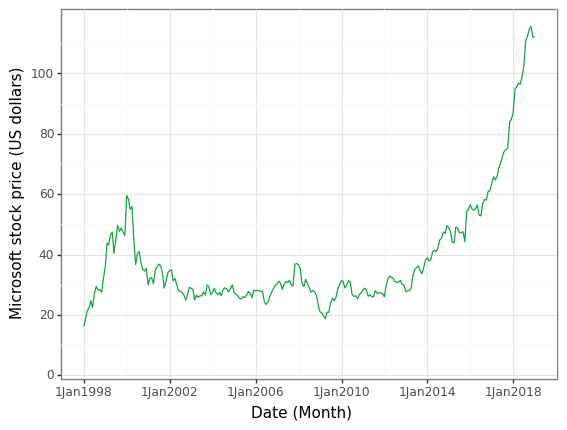

<ggplot: (308958349)>

In [68]:
(ggplot(data_monthly) 
  + geom_line(aes('date','p_MSFT'),color = color[1], size = 0.5) 
  + scale_y_continuous(expand = [0.01,0.01],limits = [0,120], breaks = seq(0,120,20)) 
  + scale_x_date(breaks = breaks(limits)[::2], labels = date_format("1%b%Y")) 
  + labs(y = "Microsoft stock price (US dollars)",x= "Date (Month)") 
  + theme_bw())

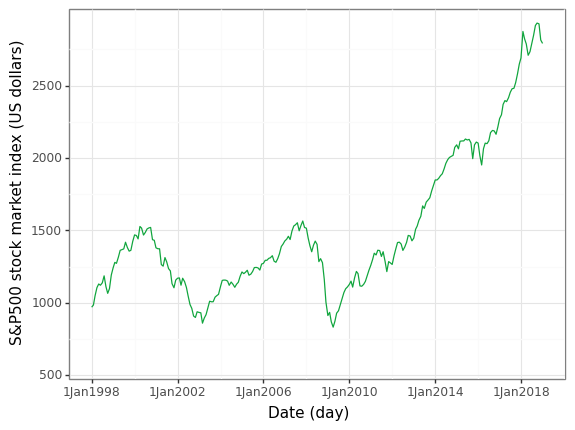

<ggplot: (-9223372036545717244)>

In [69]:
(ggplot(data_monthly) 
  + geom_line(aes('date','p_SP500'),color = color[1], size = 0.5) 
  + scale_y_continuous(expand = [0.01,0.01],limits = [500,3000], breaks = seq(500,3000,500)) 
  + scale_x_date(breaks = breaks(limits)[::2], labels = date_format("1%b%Y")) 
  + labs(y = "S&P500 stock market index (US dollars)",x= "Date (day)") 
  + theme_bw())

In [70]:
print(PhillipsPerron(data_daily['p_MSFT'],lags=32,test_type='rho',trend='n'))
print(PhillipsPerron(data_daily['p_MSFT'],lags=32,test_type='rho',trend='c'))
print(PhillipsPerron(data_daily['p_MSFT'],lags=32,test_type='rho',trend='ct'))

     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.287
P-value                         0.994
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.245
P-value                         0.998
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.092
P-value                         0.995
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

In [71]:
print(PhillipsPerron(data_daily['p_SP500'],lags=32,test_type='rho',trend='n'))
print(PhillipsPerron(data_daily['p_SP500'],lags=32,test_type='rho',trend='c'))
print(PhillipsPerron(data_daily['p_SP500'],lags=32,test_type='rho',trend='ct'))

     Phillips-Perron Test (Z-rho)    
Test Statistic                  0.908
P-value                         0.892
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.292
P-value                         0.940
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -3.943
P-value                         0.894
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

/anaconda3/lib/python3.6/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


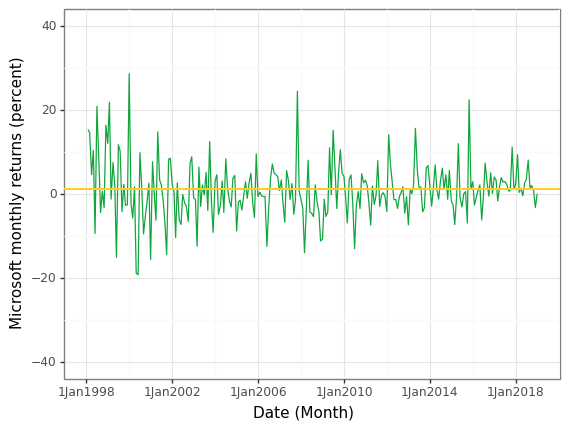

<ggplot: (-9223372036543832597)>

In [76]:
(ggplot(data_monthly) 
  + geom_line(aes('date','PctRetMSFT'),color = color[1], size = 0.5) 
  + scale_x_date(breaks = breaks(limits)[::2], labels = date_format("1%b%Y")) 
  + geom_hline(yintercept = 1.13,color=color[3], size=0.8) 
  + labs(y = "Microsoft monthly returns (percent)",x= "Date (Month)") 
  + ylim(-40,40) 
  + theme_bw())

/anaconda3/lib/python3.6/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


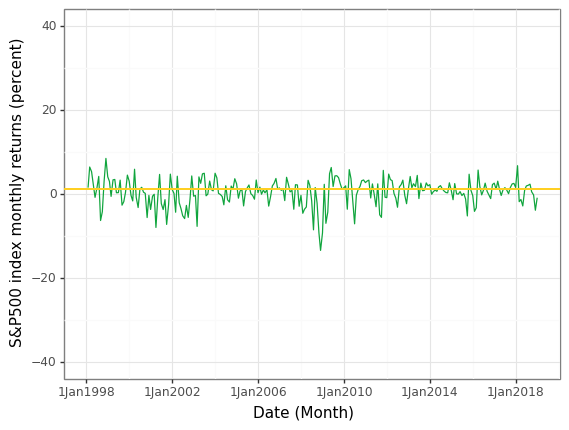

<ggplot: (312093353)>

In [77]:
(ggplot(data_monthly) 
  + geom_line(aes('date','PctRetSP500'),color = color[1], size = 0.5) 
  + scale_x_date(breaks = breaks(limits)[::2], labels = date_format("1%b%Y")) 
  + geom_hline(yintercept = 1.13,color=color[3], size=0.8) 
  + labs(y = "S&P500 index monthly returns (percent)",x= "Date (Month)") 
  + ylim(-40,40) 
  + theme_bw())

In [80]:
data_monthly[['PctRetMSFT','PctRetSP500']].describe()

,PctRetMSFT,PctRetSP500
count,252.000000,252.000000
mean,0.996238,0.470668
std,6.796333,3.164816
min,-19.188446,-13.376574
25%,-2.627228,-0.935009
50%,0.583489,0.906564
75%,3.983402,2.456007
max,28.696826,8.524844


/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


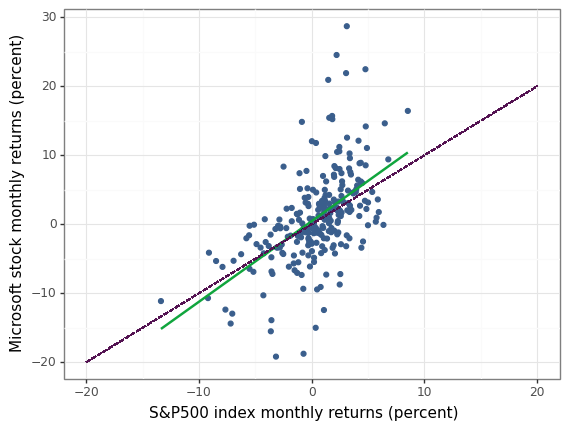

<ggplot: (-9223372036551655648)>

In [105]:
(ggplot(data_monthly,aes('PctRetSP500','PctRetMSFT'))
 + geom_point(color=color[0])
 + geom_smooth(method='lm',se=False,color=color[1])
 + labs(x="S&P500 index monthly returns (percent)",y="Microsoft stock monthly returns (percent)")
 + theme_bw()
 + geom_segment(aes(x = -20, y = -20, xend = 20, yend = 20), color=color[2], size=0.5, linetype="dashed")
)
 # geom_segment(aes(x = -20, y = -20, xend = 20, yend = 20), color=color[3], size=0.5, linetype="dashed")+
 # geom_segment(aes(x = 10, y = 0, xend = 17, yend = 17), arrow = arrow(length = unit(0.1, "cm")))+
 # annotate("text", x = 10, y = -3, size=2, label = "45 degree line for beta=1")+
 # geom_segment(aes(x = -10, y = -17, xend = -15, yend = -17), arrow = arrow(length = unit(0.1, "cm")))+
 # annotate("text", x = -5, y = -17, size=2, label = "reg line, beta=1.26")


In [111]:
data_monthly_tidy = pd.melt(data_monthly[['date','PctRetMSFT','PctRetSP500']],id_vars = ['date'],var_name='index', value_name='pct_return')

In [112]:
data_monthly_tidy

,date,index,pct_return
0,1997-12-31,PctRetMSFT,NaN
1,1998-01-30,PctRetMSFT,15.425535
2,1998-02-27,PctRetMSFT,14.620860
3,1998-03-31,PctRetMSFT,4.678363
4,1998-04-30,PctRetMSFT,10.474860
...,...,...,...
501,2018-08-31,PctRetSP500,2.388204
502,2018-09-28,PctRetSP500,0.573429
503,2018-10-31,PctRetSP500,-0.178793
504,2018-11-30,PctRetSP500,-3.815407


/anaconda3/lib/python3.6/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 3 rows containing missing values.


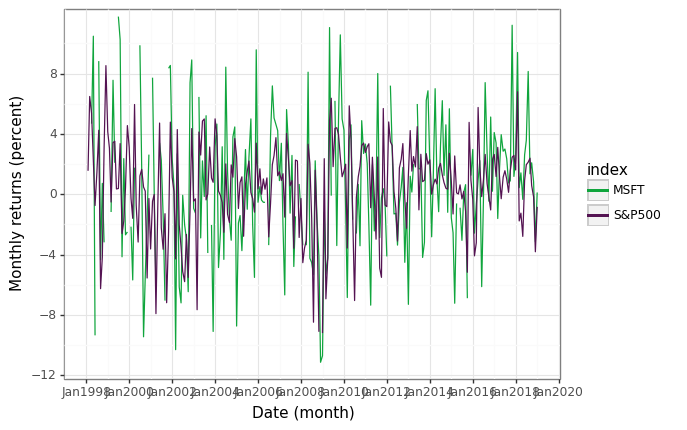

<ggplot: (324140829)>

In [118]:
(ggplot(data_monthly_tidy)
 + geom_line(aes(x='date',y = 'pct_return',color='index'),size = 0.5)
 + scale_color_manual(name = "", values=[color[1], color[2], color[3]], labels = ["MSFT", "S&P500"]) 
 + labs(x = 'Date (month)',y = "Monthly returns (percent)")
 + scale_y_continuous(expand = [0.01,0.01], limits = [-12,12], breaks = seq(-12,12,4)) 
 + scale_x_date(breaks = breaks, labels = date_format("%b%Y")) 
 + theme_bw()
)